<a href="https://colab.research.google.com/github/ashutosh-3/face_mask_detection/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten ,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='ashutoshpanda'
os.environ['KAGGLE_KEY']='2ae2bfe272b9ee93fee0ee698c731234'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 98% 204M/207M [00:01<00:00, 99.9MB/s]
100% 207M/207M [00:01<00:00, 113MB/s] 


In [ ]:
! unzip covid-face-mask-detection-dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir= '/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
val_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_no_mask_dir=os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_no_mask_names=os.listdir(train_no_mask_dir)
print(train_no_mask_names[:10])

['0714.jpg', '1160.jpg', '1577.jpg', '1664.jpg', '0784.jpg', '0243.jpg', '0110.jpg', '0427.jpg', '1279.jpg', '1247.jpg']
['265.jpg', '64.jpg', '213.jpg', '263.jpg', '69.jpg', '80.jpg', '317.jpg', '47.jpg', '281.jpg', '196.jpg']


['/content/New Masks Dataset/Train/Mask/0714.jpg', '/content/New Masks Dataset/Train/Mask/1160.jpg', '/content/New Masks Dataset/Train/Mask/1577.jpg', '/content/New Masks Dataset/Train/Mask/1664.jpg', '/content/New Masks Dataset/Train/Mask/0784.jpg', '/content/New Masks Dataset/Train/Mask/0243.jpg', '/content/New Masks Dataset/Train/Mask/0110.jpg', '/content/New Masks Dataset/Train/Mask/0427.jpg']
['/content/New Masks Dataset/Train/Non Mask/265.jpg', '/content/New Masks Dataset/Train/Non Mask/64.jpg', '/content/New Masks Dataset/Train/Non Mask/213.jpg', '/content/New Masks Dataset/Train/Non Mask/263.jpg', '/content/New Masks Dataset/Train/Non Mask/69.jpg', '/content/New Masks Dataset/Train/Non Mask/80.jpg', '/content/New Masks Dataset/Train/Non Mask/317.jpg', '/content/New Masks Dataset/Train/Non Mask/47.jpg']


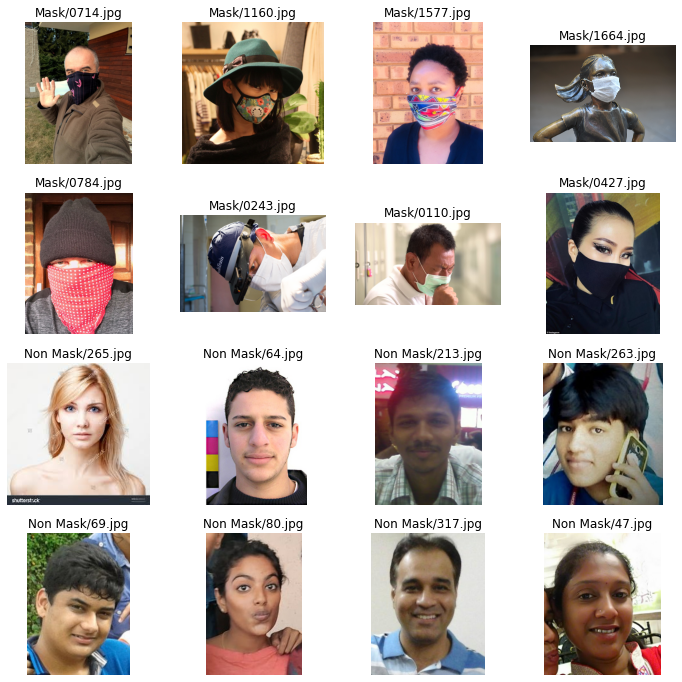

In [ ]:
import matplotlib.image as npimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_img=[]
for i in train_mask_names[0:8]:
  mask_img.append(os.path.join(train_mask_dir,i))

nomask_img=[]
for i in train_no_mask_names[0:8]:
  nomask_img.append(os.path.join(train_no_mask_dir,i))

print(mask_img)
print(nomask_img)  

merged_list=mask_img+nomask_img
for i in range(0,len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=npimg.imread(merged_list[i])
  sp.set_title(data,fontsize=12)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  rotation_range=40,
                                  horizontal_flip=True
                                  )
test_datagen= ImageDataGenerator(rescale=1./255)
val_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary'
                                                   )
test_generator= test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary'
                                                   ) 
val_generator= val_datagen.flow_from_directory(val_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary'
                                                   ) 

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy']) 

In [ ]:
histroy=model.fit(train_generator,
                  epochs=30,
                  validation_data=val_generator)

Epoch 1/30
19/19 [==============================] - 36s 2s/step - loss: 3.5319 - accuracy: 0.5100 - val_loss: 0.6919 - val_accuracy: 0.5425
Epoch 2/30
19/19 [==============================] - 35s 2s/step - loss: 0.6780 - accuracy: 0.6133 - val_loss: 0.6692 - val_accuracy: 0.7712
Epoch 3/30
19/19 [==============================] - 35s 2s/step - loss: 0.5623 - accuracy: 0.7450 - val_loss: 0.4919 - val_accuracy: 0.8693
Epoch 4/30
19/19 [==============================] - 35s 2s/step - loss: 0.4270 - accuracy: 0.8233 - val_loss: 0.4812 - val_accuracy: 0.8203
Epoch 5/30
19/19 [==============================] - 35s 2s/step - loss: 0.3620 - accuracy: 0.8767 - val_loss: 0.3367 - val_accuracy: 0.9020
Epoch 6/30
19/19 [==============================] - 35s 2s/step - loss: 0.3355 - accuracy: 0.8733 - val_loss: 0.3370 - val_accuracy: 0.9020
Epoch 7/30
19/19 [==============================] - 36s 2s/step - loss: 0.2838 - accuracy: 0.8883 - val_loss: 0.2976 - val_accuracy: 0.8987
Epoch 8/30
19/19 [==

In [ ]:
histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
from google.colab import files
from keras.preprocessing import image
upload = files.upload()
for fname in upload.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(fname)

  if prediction == 0:
    print("MASK")
  else:
    print("NO MASK")  

Saving nomask.jpg to nomask (2).jpg
Saving mask.jpg to mask (2).jpg
nomask.jpg
NO MASK
mask.jpg
MASK


In [ ]:
model.save('model.h5')